## 1. Connect Dataset

In [ ]:
!pip install kaggle
from google.colab import files
files.upload()  # 上传 kaggle.json 文件


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kiki9876","key":"8419262a94211ef0f4b74a0e22380fe1"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d shashanknecrothapa/ames-housing-dataset -p /content --unzip
import pandas as pd
df = pd.read_csv('/content/AmesHousing.csv')
df.head()


Dataset URL: https://www.kaggle.com/datasets/shashanknecrothapa/ames-housing-dataset
License(s): unknown
  0% 0.00/185k [00:00<?, ?B/s]
100% 185k/185k [00:00<00:00, 44.3MB/s]


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


## 2. Data Overview

In [ ]:
df.shape


(2930, 82)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [ ]:
df.describe(include = "all")

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2930,2440.000000,2930.000000,2930,198,2930,2930,...,2930.000000,13,572,106,2930.000000,2930.000000,2930.000000,2930,2930,2930.000000
unique,NaN,NaN,NaN,7,NaN,NaN,2,2,4,4,...,NaN,4,4,5,NaN,NaN,NaN,10,6,NaN
top,NaN,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,...,NaN,Ex,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,NaN,2273,NaN,NaN,2918,120,1859,2633,...,NaN,4,330,95,NaN,NaN,NaN,2536,2413,NaN
mean,1465.50000,7.144645e+08,57.387372,NaN,69.224590,10147.921843,NaN,NaN,NaN,NaN,...,2.243345,NaN,NaN,NaN,50.635154,6.216041,2007.790444,NaN,NaN,180796.060068
std,845.96247,1.887308e+08,42.638025,NaN,23.365335,7880.017759,NaN,NaN,NaN,NaN,...,35.597181,NaN,NaN,NaN,566.344288,2.714492,1.316613,NaN,NaN,79886.692357
min,1.00000,5.263011e+08,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,12789.000000
25%,733.25000,5.284770e+08,20.000000,NaN,58.000000,7440.250000,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,4.000000,2007.000000,NaN,NaN,129500.000000
50%,1465.50000,5.354536e+08,50.000000,NaN,68.000000,9436.500000,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,160000.000000
75%,2197.75000,9.071811e+08,70.000000,NaN,80.000000,11555.250000,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,213500.000000


## 3.Data Validation

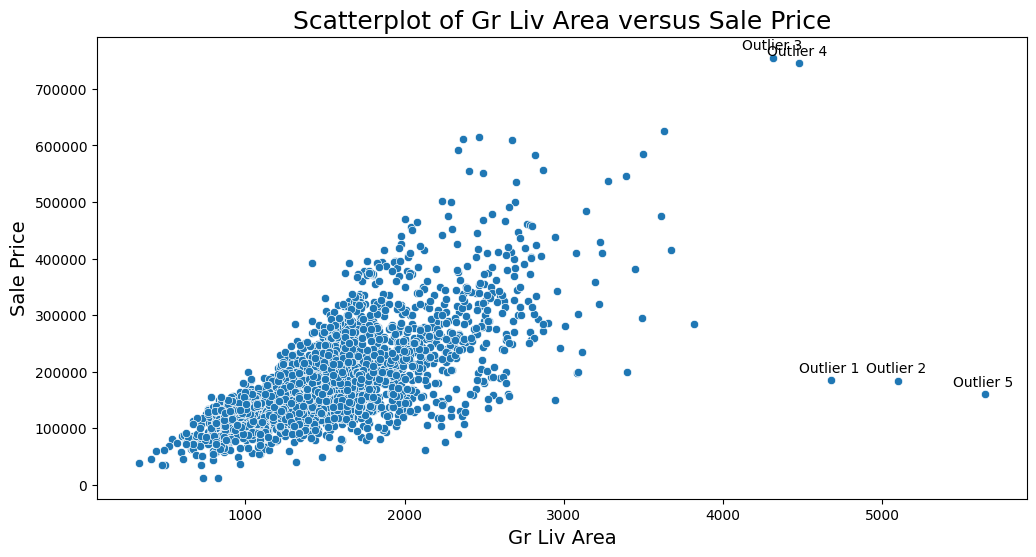

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_outliers(feature, x_val, annotate=0):
    # Create mask to select properties with more than 4,000 sqft
    outliers = df[df[feature] > x_val][[feature,'SalePrice']].values
    outliers

    # Plot outliers
    plt.figure(figsize=(12,6))
    ax = plt.gca()
    sns.scatterplot(data=df, x=feature, y='SalePrice', ax=ax)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Sale Price', fontsize=14)

    for i, _ in enumerate(outliers):
        xy=(-200, 15_000)
        if annotate == 1:
            ax.annotate(f'Outlier {i+1}', xy=(xy + outliers[-i-1]))
    plt.title(f'Scatterplot of {feature} versus Sale Price', fontsize=18)


plot_outliers('Gr Liv Area', 4000, annotate=1)

In [ ]:
# Drop outliers
df.drop(df[df['Gr Liv Area'] > 4000].index, inplace=True);

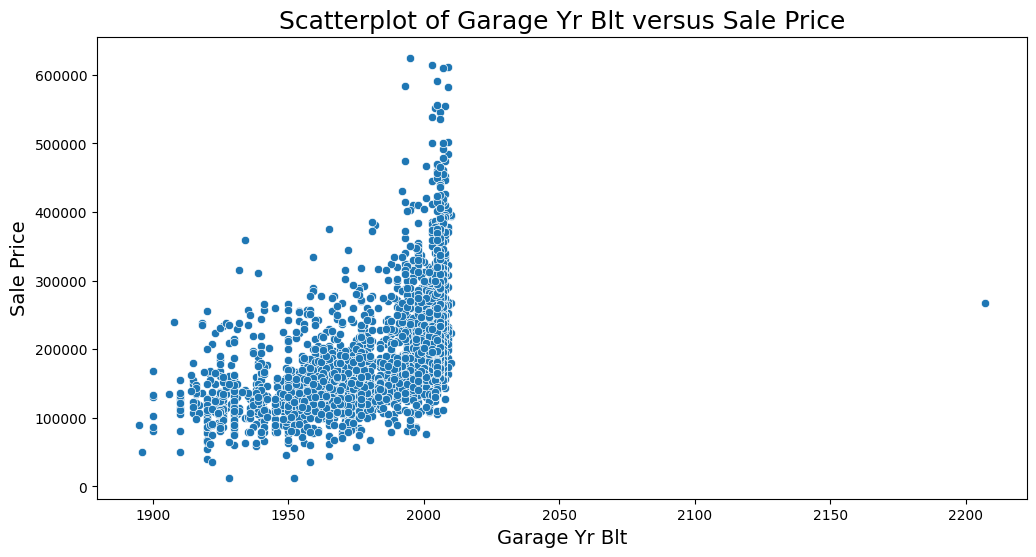

In [ ]:
plot_outliers('Garage Yr Blt', 2200)

In [ ]:
# Direct assignment without chained assignment
df['Garage Yr Blt'] = df['Garage Yr Blt'].replace({2207: 2007})

## 4. Data Cleaning

### 4.1 Remove Duplicate

In [ ]:
# Check for duplicate rows
duplicate_rows = df.duplicated()
print("Are there any duplicate rows?", duplicate_rows.any())

# If there are duplicate rows, count them
if duplicate_rows.any():
    print("Number of duplicate rows:", duplicate_rows.sum())
else:
    print("No duplicate rows found")


Are there any duplicate rows? False
No duplicate rows found


### 4.2 Handle Missing Value

In [ ]:
missing_data = df.isnull().sum().sort_values(ascending=False)
missing_data = missing_data[missing_data > 0]
print("Missing values:\n", missing_data)

Missing values:
 Pool QC           2914
Misc Feature      2820
Alley             2727
Fence             2354
Mas Vnr Type      1774
Fireplace Qu      1422
Lot Frontage       490
Garage Cond        159
Garage Finish      159
Garage Yr Blt      159
Garage Qual        159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Qual           80
Bsmt Cond           80
BsmtFin Type 1      80
Mas Vnr Area        23
Bsmt Full Bath       2
Bsmt Half Bath       2
BsmtFin SF 1         1
Garage Cars          1
Electrical           1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
Garage Area          1
dtype: int64


In [ ]:
# Fill missing values based on specified rules
df['Lot Frontage'] = df['Lot Frontage'].fillna(df['Lot Frontage'].median())  # Fill with median
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(1)                           # Fill with 1
df['Bsmt Full Bath'] = df['Bsmt Full Bath'].fillna(0)                        # Fill with 0
df['Bsmt Half Bath'] = df['Bsmt Half Bath'].fillna(0)                        # Fill with 0
df['BsmtFin SF 1'] = df['BsmtFin SF 1'].fillna(0)                            # Fill with 0
df['Garage Cars'] = df['Garage Cars'].fillna(df['Garage Cars'].median())     # Fill with median
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])       # Fill with mode
df['Total Bsmt SF'] = df['Total Bsmt SF'].fillna(0)                          # Fill with 0
df['Bsmt Unf SF'] = df['Bsmt Unf SF'].fillna(0)                              # Fill with 0
df['BsmtFin SF 2'] = df['BsmtFin SF 2'].fillna(0)                            # Fill with 0
df['Garage Area'] = df['Garage Area'].fillna(df['Garage Area'].median())     # Fill with median
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)                          # Fill with 0

In [ ]:
missing_data = df.isnull().sum().sort_values(ascending=False)
missing_data = missing_data[missing_data > 0]
print("Missing values:\n", missing_data)

Missing values:
 Pool QC           2914
Misc Feature      2820
Alley             2727
Fence             2354
Mas Vnr Type      1774
Fireplace Qu      1422
Garage Qual        159
Garage Cond        159
Garage Finish      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Qual           80
BsmtFin Type 1      80
Bsmt Cond           80
dtype: int64


In [ ]:
import pandas as pd
import numpy as np

# Group 1: Replace both NaN and empty values with 'None'
columns_replace_na_and_empty = [
    'Garage Cond', 'Garage Finish', 'Garage Qual',
    'Bsmt Exposure', 'BsmtFin Type 2', 'Bsmt Qual', 'Bsmt Cond', 'BsmtFin Type 1'
]

# Replace empty strings and NaN with "Missing"
for col in columns_replace_na_and_empty:
    # Replace empty strings with "Missing"
    df[col] = df[col].replace('', 'Missing')  # Using df[col] assignment

    # Replace NaN with "Missing"
    df[col] = df[col].fillna('Missing')  # Using df[col] assignment

# Group 2: Replace only NaN values with 'Missing'
columns_replace_na_only = [
    'Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Garage Type', 'Fireplace Qu', 'Mas Vnr Type'
]

df[columns_replace_na_only] = df[columns_replace_na_only].fillna('Missing')

# Verify replacements by checking unique values in each column
for col in columns_replace_na_and_empty + columns_replace_na_only:
    print(f"{col}: {df[col].unique()}")


Garage Cond: ['TA' 'Missing' 'Fa' 'Gd' 'Ex' 'Po']
Garage Finish: ['Fin' 'Unf' 'RFn' 'Missing']
Garage Qual: ['TA' 'Missing' 'Fa' 'Gd' 'Ex' 'Po']
Bsmt Exposure: ['Gd' 'No' 'Mn' 'Av' 'Missing']
BsmtFin Type 2: ['Unf' 'LwQ' 'BLQ' 'Rec' 'Missing' 'GLQ' 'ALQ']
Bsmt Qual: ['TA' 'Gd' 'Ex' 'Missing' 'Fa' 'Po']
Bsmt Cond: ['Gd' 'TA' 'Missing' 'Po' 'Fa' 'Ex']
BsmtFin Type 1: ['BLQ' 'Rec' 'ALQ' 'GLQ' 'Unf' 'LwQ' 'Missing']
Pool QC: ['Missing' 'Ex' 'Gd' 'TA' 'Fa']
Misc Feature: ['Missing' 'Gar2' 'Shed' 'Othr' 'TenC']
Alley: ['Missing' 'Pave' 'Grvl']
Fence: ['Missing' 'MnPrv' 'GdPrv' 'GdWo' 'MnWw']
Garage Type: ['Attchd' 'BuiltIn' 'Basment' 'Detchd' 'Missing' 'CarPort' '2Types']
Fireplace Qu: ['Gd' 'Missing' 'TA' 'Po' 'Ex' 'Fa']
Mas Vnr Type: ['Stone' 'Missing' 'BrkFace' 'BrkCmn' 'CBlock']


In [ ]:
missing_data = df.isnull().sum().sort_values(ascending=False)
missing_data = missing_data[missing_data > 0]
print("Missing values:\n", missing_data)

Missing values:
 Series([], dtype: int64)


In [ ]:
df.to_csv('cleaned_data.csv', index=False)
from google.colab import files
files.download('cleaned_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Encoding Testing

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/My Drive/MLOps Project/cleaned_data.csv')
missing_data = df.isnull().sum().sort_values(ascending=False)
missing_data = missing_data[missing_data > 0]
print("Missing values:\n", missing_data)

Missing values:
 Series([], dtype: int64)


## 5. Label Encoding


In [ ]:
# 1. Quality data
custom_mapping = {
    'Missing': 0,
    'Po': 1,
    'Fa': 2,
    'TA': 3,  # TA often stands for Typical/Average
    'Gd': 4,
    'Ex': 5
}

# Apply the custom mapping to relevant columns
# For demonstration, applying to a hypothetical subset of columns (e.g., Quality/Condition columns)
# Adjust 'quality_cols' based on the actual columns that use this rating system
quality_cols = ['Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Heating QC', 'Kitchen Qual', 'Fireplace Qu', 'Garage Qual', 'Garage Cond', 'Pool QC']

# Apply the custom encoding
for col in quality_cols:
    if col in df.columns:
        df[col] = df[col].map(custom_mapping)

        # Print the mapping table for each column
        print(f"Mapping for column '{col}':")
        mapping_df = pd.DataFrame(list(custom_mapping.items()), columns=[f"{col}_Category", f"{col}_Encoded"])
        print(mapping_df)
        print("\n")


Mapping for column 'Exter Qual':
  Exter Qual_Category  Exter Qual_Encoded
0             Missing                   0
1                  Po                   1
2                  Fa                   2
3                  TA                   3
4                  Gd                   4
5                  Ex                   5


Mapping for column 'Exter Cond':
  Exter Cond_Category  Exter Cond_Encoded
0             Missing                   0
1                  Po                   1
2                  Fa                   2
3                  TA                   3
4                  Gd                   4
5                  Ex                   5


Mapping for column 'Bsmt Qual':
  Bsmt Qual_Category  Bsmt Qual_Encoded
0            Missing                  0
1                 Po                  1
2                 Fa                  2
3                 TA                  3
4                 Gd                  4
5                 Ex                  5


Mapping for column 'Bsmt Con

In [ ]:
# 2. Other categorical mappings

# Define custom mappings for each column based on the provided logic
custom_mappings = {
    'Land Slope': {'Gtl': 1, 'Mod': 2, 'Sev': 3},
    'Bsmt Exposure': {'Gd': 4, 'No': 1, 'Mn': 2, 'Av': 3, 'Missing': 0},
    'Lot Shape': {'IR1': 1, 'Reg': 4, 'IR2': 2, 'IR3': 3},
    'Functional': {'Typ': 1, 'Mod': 2, 'Min1': 3, 'Min2': 4, 'Maj1': 5, 'Maj2': 6, 'Sev': 7, 'Sal': 8},
    'Garage Finish': {'Fin': 3, 'Unf': 1, 'RFn': 2, 'Missing': 0},
    'Paved Drive': {'P': 1, 'Y': 2, 'N': 0},
    'Central Air': {'Y': 1, 'N': 0}
}

# Apply the custom mappings to each column in the DataFrame
for col, mapping in custom_mappings.items():
    if col in df.columns:
        # Replace values in each column according to the mapping dictionary
        df[col] = df[col].map(mapping)

        # Display the mapping used for verification
        print(f"Encoding for column '{col}':")
        mapping_df = pd.DataFrame(list(mapping.items()), columns=[f"{col}_Category", f"{col}_Encoded"])
        print(mapping_df)
        print("\n")


Encoding for column 'Land Slope':
  Land Slope_Category  Land Slope_Encoded
0                 Gtl                   1
1                 Mod                   2
2                 Sev                   3


Encoding for column 'Bsmt Exposure':
  Bsmt Exposure_Category  Bsmt Exposure_Encoded
0                     Gd                      4
1                     No                      1
2                     Mn                      2
3                     Av                      3
4                Missing                      0


Encoding for column 'Lot Shape':
  Lot Shape_Category  Lot Shape_Encoded
0                IR1                  1
1                Reg                  4
2                IR2                  2
3                IR3                  3


Encoding for column 'Functional':
  Functional_Category  Functional_Encoded
0                 Typ                   1
1                 Mod                   2
2                Min1                   3
3                Min2           

In [ ]:
# Identify any remaining categorical columns in the dataset
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Dictionary to store the mappings used for any remaining categorical columns
remaining_mappings = {}

# Check if there are any remaining categorical columns and encode them
for col in categorical_cols:
    # Create a mapping where 'Missing' (if present) is 0, and other unique categories are mapped to 1, 2, 3...
    unique_values = df[col].unique()
    mapping = {val: (0 if val == 'Missing' else i + 1) for i, val in enumerate(unique_values)}

    # Apply the mapping to the column
    df[col] = df[col].map(mapping)

    # Store the mapping for future reference
    remaining_mappings[col] = mapping

    # Display the mapping for each column
    print(f"Encoding for remaining column '{col}':")
    mapping_df = pd.DataFrame(list(mapping.items()), columns=[f"{col}_Category", f"{col}_Encoded"])
    print(mapping_df)
    print("\n")


Encoding for remaining column 'MS Zoning':
  MS Zoning_Category  MS Zoning_Encoded
0                 RL                  1
1                 RH                  2
2                 FV                  3
3                 RM                  4
4            C (all)                  5
5            I (all)                  6
6            A (agr)                  7


Encoding for remaining column 'Street':
  Street_Category  Street_Encoded
0            Pave               1
1            Grvl               2


Encoding for remaining column 'Alley':
  Alley_Category  Alley_Encoded
0        Missing              0
1           Pave              2
2           Grvl              3


Encoding for remaining column 'Land Contour':
  Land Contour_Category  Land Contour_Encoded
0                   Lvl                     1
1                   HLS                     2
2                   Bnk                     3
3                   Low                     4


Encoding for remaining column 'Utilities':
 

In [ ]:
df.to_csv('encoding_data.csv', index=False)
from google.colab import files
files.download('encoding_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 6. Standardization and Normalization